#**Group** - **24** 


#Group Members - 

*Harsh Shingala

*Mayur Mahanta

*Praneeth Gorrela

#Foundation of Data Analytics 

**Project 2**

The objective of project 2 is to extract time series features for human activity
monitoring.


**Dataset**

Human activity data for 15 subjects are given. Click on each subject to
access the time series data. For this project consider accelerometer data for all the 15
subjects for walking, running, climbing up and climbing down


In [1]:
#Mounting Google Drive for reading data sets of 15 subjects
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Installing Libraries for time series mapping of given data
!pip install ts2vg
!pip install igraph
!pip install pycairo
!pip install cairocffi

     |████████████████████████████████| 1.0 MB 7.3 MB/s 
     |████████████████████████████████| 3.1 MB 8.3 MB/s 
     |████████████████████████████████| 340 kB 7.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo which use PEP 517 and cannot be installed directly
     |████████████████████████████████| 88 kB 4.3 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.3.0-py3-none-any.whl size=89668 sha256=38ea6853fb8a5aa0fa624131d5570f74b4217866ea3b2f02323980b7dfed9023
  Stored in directory: /root/.cache/pip/wheels/4e/ca/e1/5c8a9692a27f639a07c949044bec943f26c81cd53d3805319f
Successfully built cairocffi


In [3]:
#importing required librarires and mounting the drive to read the data sets of the directory
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from ts2vg import NaturalVG
from ts2vg import HorizontalVG
from google.colab import drive


drive.mount('/content/drive/')
%cd /content/drive/MyDrive/FDA File Storage/FDA_Project_2_Group_24/FDA_Project_2_Data_Sets

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/FDA File Storage/FDA_Project_2_Group_24/FDA_Project_2_Data_Sets


In [6]:
#listing the concerned data sets to work with

directory_path = '/content/drive/MyDrive/FDA File Storage/FDA_Project_2_Group_24/FDA_Project_2_Data_Sets'
directory_content = os.listdir(directory_path)


print(directory_content)
directory_content.count

['Sub_10_acc_walking_waist.csv', 'Sub_10_acc_walking_shin.csv', 'Sub_10_acc_walking_thigh.csv', 'Sub_10_acc_walking_forearm.csv', 'Sub_10_acc_walking_upperarm.csv', 'Sub_10_acc_walking_head.csv', 'Sub_10_acc_walking_chest.csv', 'Sub_10_acc_running_forearm.csv', 'Sub_10_acc_running_upperarm.csv', 'Sub_10_acc_running_waist.csv', 'Sub_10_acc_running_chest.csv', 'Sub_10_acc_running_head.csv', 'Sub_10_acc_running_shin.csv', 'Sub_10_acc_running_thigh.csv', 'Sub_10_acc_climbingup_head.csv', 'Sub_10_acc_climbingup_thigh.csv', 'Sub_10_acc_climbingup_upperarm.csv', 'Sub_10_acc_climbingup_forearm.csv', 'Sub_10_acc_climbingup_waist.csv', 'Sub_10_acc_climbingup_shin.csv', 'Sub_10_acc_climbingup_chest.csv', 'Sub_10_acc_climbingdown_chest.csv', 'Sub_10_acc_climbingdown_shin.csv', 'Sub_10_acc_climbingdown_thigh.csv', 'Sub_10_acc_climbingdown_waist.csv', 'Sub_10_acc_climbingdown_head.csv', 'Sub_10_acc_climbingdown_upperarm.csv', 'Sub_10_acc_climbingdown_forearm.csv', 'Sub_11_acc_running_head.csv', 'Sub

<function list.count>

**Task 1**

1. Apply natural visibility graph (NVG) and horizontal visibility graph (HVG) to the
aforementioned data
2. Compute average degree, network diameter, and average path length
3. For the above computations select sample size of 1024 data points ( from 1000
to 2024) for each of the 15 time series
4. Tabulate all the results


In [5]:
#forming the output table by applying NVG and HVG to the datasets and computing avg degree, network diameter and avg path length


accelerometer_axis = ['attr_x', 'attr_y', 'attr_z']
graphs = ['HVG', 'NVG']
output_table = pd.DataFrame(columns = ['Method', 'Subject', 'Accelerometer', 'Average_Degree', 'Network_Diameter', 'Average Path Length', 'Activity', 'Classification'])


for method in graphs:

  if method == 'NVG':
    for ax in accelerometer_axis:

      acc = ax.split('_')[1].capitalize()

      for file in directory_content:

        dataframe = pd.read_csv(file)
        dataframe = dataframe.iloc[1000:2024]
        g_m = NaturalVG()
        g_m.build(dataframe[ax])
        ig_g = g_m.as_igraph()
        Avg_Deg = np.mean(ig_g.degree())
        Net_Diameter = ig_g.diameter()
        Avg_Path_Len = ig_g.average_path_length()
        head_sens_loc = file.split('_')[4].split('.')[0].capitalize()

        activity = file.split('_')[3].capitalize()
        subject = file.split('_')[1]

        output_table=output_table.append({'Method': method , 'Subject' : subject, 'Accelerometer' : acc, 'Average_Degree' : Avg_Deg, 'Network_Diameter' : Net_Diameter, 'Average Path Length' : Avg_Path_Len, 'Activity' : activity, 'Classification' : head_sens_loc},ignore_index=True)
  
  else:
    for ax in accelerometer_axis:

      acc = ax.split('_')[1].capitalize()

      for file in directory_content:

        dataframe = pd.read_csv(file)
        dataframe = dataframe.iloc[1000:2024]
        g_m = HorizontalVG()
        g_m.build(dataframe[ax])
        ig_g = g_m.as_igraph()
        Avg_Deg = np.mean(ig_g.degree())
        Net_Diameter = ig_g.diameter()
        Avg_Path_Len = ig_g.average_path_length()
        head_sens_loc = file.split('_')[4].split('.')[0].capitalize()

        activity = file.split('_')[3].capitalize()
        subject = file.split('_')[1]

        output_table=output_table.append({'Method': method , 'Subject' : subject, 'Accelerometer' : acc, 'Average_Degree' : Avg_Deg, 'Network_Diameter' : Net_Diameter, 'Average Path Length' : Avg_Path_Len, 'Activity' : activity, 'Classification' : head_sens_loc},ignore_index=True)


print("\n\t\t\t\t\t\t\t\tOutput Table\n")
output_table


								Output Table



,Method,Subject,Accelerometer,Average_Degree,Network_Diameter,Average Path Length,Activity,Classification
0,HVG,10,X,3.962891,28,11.982086,Walking,Waist
1,HVG,10,X,3.875000,64,23.653069,Walking,Shin
2,HVG,10,X,3.955078,23,9.479419,Walking,Thigh
3,HVG,10,X,3.933594,39,14.542684,Walking,Forearm
4,HVG,10,X,3.937500,35,15.376997,Walking,Upperarm
...,...,...,...,...,...,...,...,...
2509,NVG,13,Z,7.730469,10,4.781744,Walking,Thigh
2510,NVG,13,Z,7.523438,10,4.803943,Walking,Shin
2511,NVG,13,Z,15.369141,10,4.381308,Walking,Head
2512,NVG,13,Z,11.533203,9,4.657413,Walking,Forearm


**Task 1**

5. Generate scatter plots: average degree vs network diameter and color the points
according to walking and running (do this for each accelerometer signal and
each method (HVH and NVG))


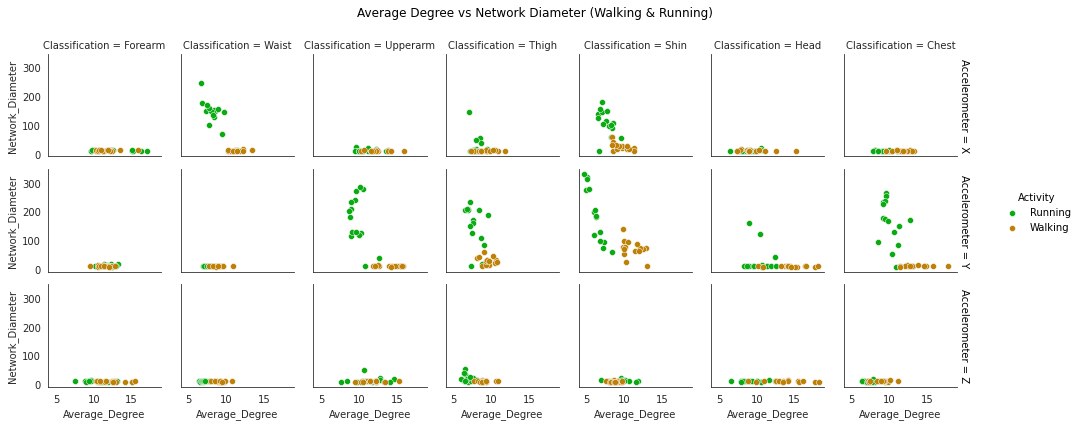

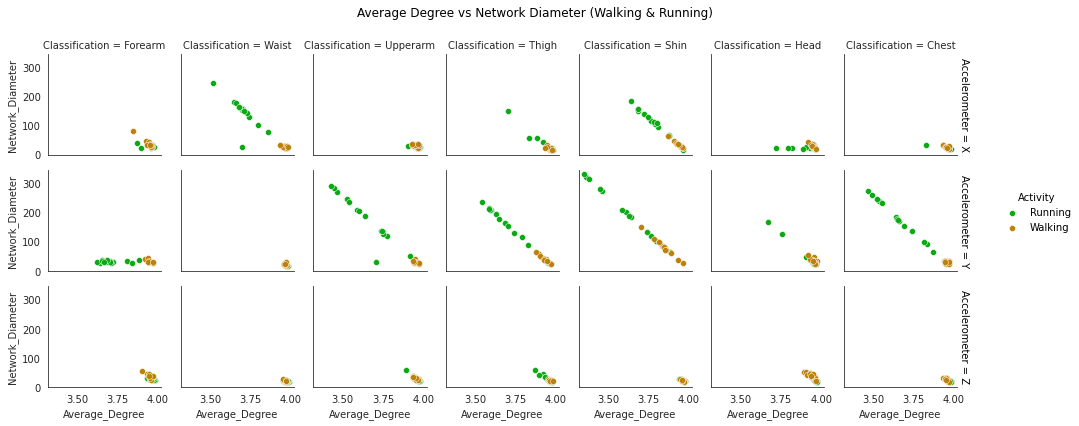

In [ ]:
#generating scatter plot for average degree vs network diameter (Running and Walking)

Activity = ['Running', 'Walking']
activity_r_w = output_table[output_table['Activity'].isin(Activity)]
graphs = ['NVG', 'HVG']
colors = ["#0AAA13", "#BE8107"]
sns.set_palette(sns.color_palette(colors))

for method in graphs:
  scatter_plot_dataframe_r_w = activity_r_w[activity_r_w['Method'] == method]

  with sns.axes_style("white"):

    g_m = sns.FacetGrid(scatter_plot_dataframe_r_w, col="Classification", row="Accelerometer",hue='Activity', margin_titles=True, height=2.0)

  g_m.map(sns.scatterplot, "Average_Degree", "Network_Diameter")
  g_m.add_legend()
  g_m.fig.subplots_adjust(top = 0.87) 
  g_m.fig.suptitle('Average Degree vs Network Diameter (Walking & Running)')

**Task 1**

6. Generate scatter plots: average degree vs network diameter and color the points
according to climbing up and climbing down (do this for each accelerometer
signal and each method (HVH and NVG))


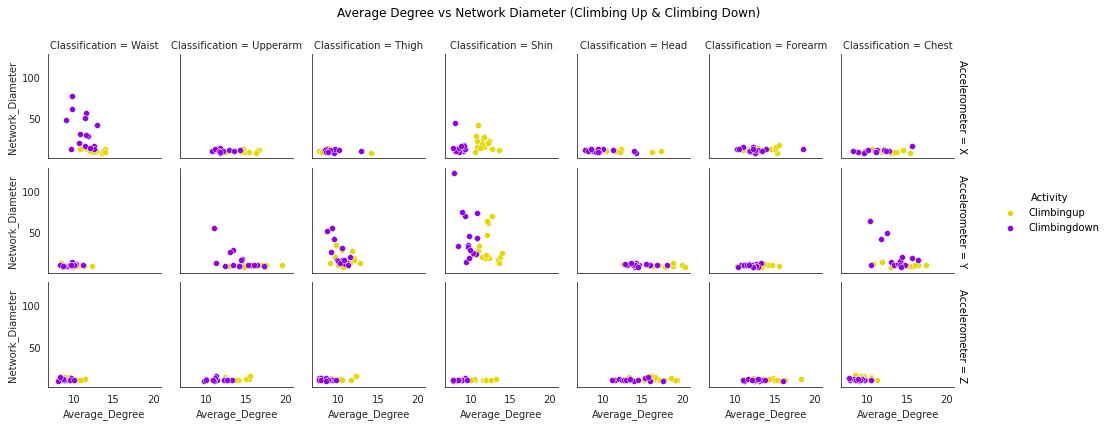

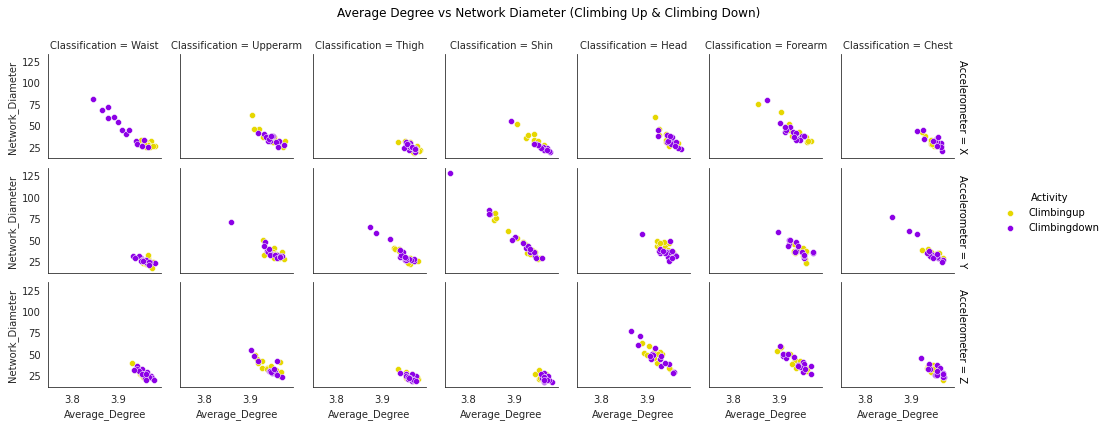

In [ ]:
#generating scatter plot for average degree vs network diameter (Climbing Up and Climbing Down)

Activity = ['Climbingup', 'Climbingdown']
activity_cu_cd = output_table[output_table['Activity'].isin(Activity)]
graphs = ['NVG', 'HVG']
colors = ["#E6D700", "#8C00E6"]
sns.set_palette(sns.color_palette(colors))


for method in graphs:

  scatter_dataframe_cu_cd = activity_cu_cd[activity_cu_cd['Method'] == method]

  with sns.axes_style("white"):

    g_m = sns.FacetGrid(scatter_dataframe_cu_cd, col="Classification", row="Accelerometer",hue='Activity', margin_titles=True, height=2.0)

  g_m.map(sns.scatterplot, "Average_Degree", "Network_Diameter")
  g_m.add_legend()
  g_m.fig.subplots_adjust(top = 0.87) 
  g_m.fig.suptitle('Average Degree vs Network Diameter (Climbing Up & Climbing Down)')

**Task2**

1. Compute permutation entropy and complexity for the aforementioned data. Consider the accelerometer data in all three directions
2. Vary the following parameters
a)Embedded Dimension
3, 4, 5, 6
b)Embedded Delay
1, 2, 3
c)Signal length
1024, 2048, 4096



In [13]:
#Defining all the functions required for the computations

def entropy1(tab_f):

    tab_f = [element for element in tab_f if element != 0]
    ent1_s = 0.0

    for f in tab_f:

        ent1_s += f * np.log(f)

    ent1_s = -ent1_s

    return(ent1_s)

def ordinal_patterns(ts, embdim, embdelay):

    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):

    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):

    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(entropy1(p)/max_entropy)

def complexity(op):

    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (entropy1(temp_op_prob2) - 0.5 * entropy1(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

In [14]:
#forming the output table by computing Permutation entropy,Complexity.

output_table = pd.DataFrame(columns=['Subject', 'Accelerometer', 'Signal_length', 'Dimension', 'Delay', 'Permutation entropy', 'Complexity', 'Activity', 'Classification'])
accelerometer_axis = ['attr_x', 'attr_y', 'attr_z']
signal_length = [1028, 2048, 4096]
dimension = [3,4,5,6]
delay = [1,2,3]
for a in accelerometer_axis:
  acc = a.split('_')[1].capitalize()
  for sl in signal_length:
    for d in dimension:
      for de in delay:
        for file in directory_content:
          dataframe = pd.read_csv(file)
          ts = dataframe[a][1:sl]
          op = ordinal_patterns(ts,d,de)
          pe = p_entropy(op)
          comp = complexity(op)
          sensor = file.split('_')[4].split('.')[0].capitalize()
          subject = file.split('_')[1]
          activity = file.split('_')[3].capitalize()
          output_table = output_table.append({'Subject': subject, 'Accelerometer': acc,'Signal_length': sl, 'Dimension': d,'Delay': de, 'Permutation entropy' : pe, 'Complexity' : comp, 'Activity' : activity, 'Classification' : sensor}, ignore_index= True)


print("\n\t\t\t\t\t\t\t\tOutput Table\n")
output_table


								Output Table



,Subject,Accelerometer,Signal_length,Dimension,Delay,Permutation entropy,Complexity,Activity,Classification
0,10,X,1028,3,1,0.853176,0.121622,Walking,Waist
1,10,X,1028,3,1,0.971738,0.026050,Walking,Shin
2,10,X,1028,3,1,0.923992,0.067541,Walking,Thigh
3,10,X,1028,3,1,0.898414,0.087855,Walking,Forearm
4,10,X,1028,3,1,0.821949,0.143281,Walking,Upperarm
...,...,...,...,...,...,...,...,...,...
45247,13,Z,4096,6,3,0.964905,0.077858,Walking,Thigh
45248,13,Z,4096,6,3,0.968771,0.071286,Walking,Shin
45249,13,Z,4096,6,3,0.842051,0.259373,Walking,Head
45250,13,Z,4096,6,3,0.911708,0.166298,Walking,Forearm


3. Generate scatter plots: permutation entropy vs complexity and color the points according to walking and running (for signal length =4096, embedded delay = 1, and embedded dimension = 3, 4, 5, 6, and all three accelerometer directions)


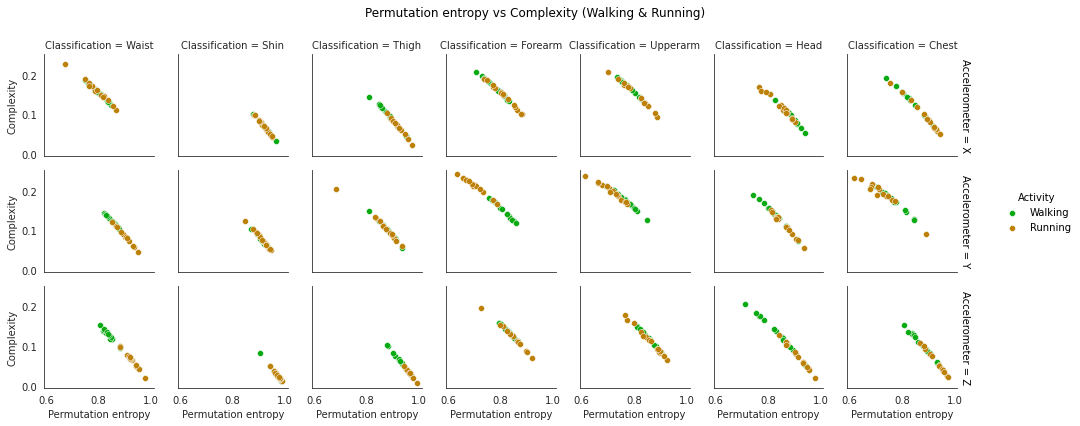

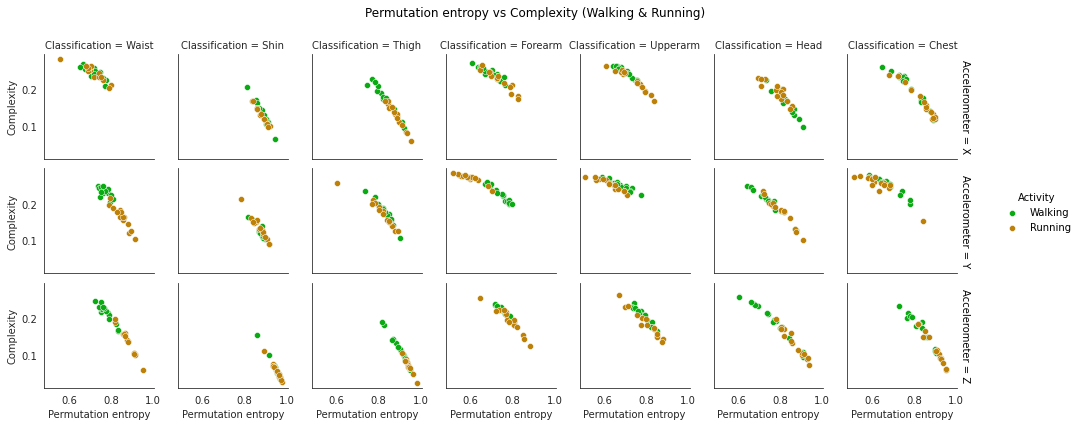

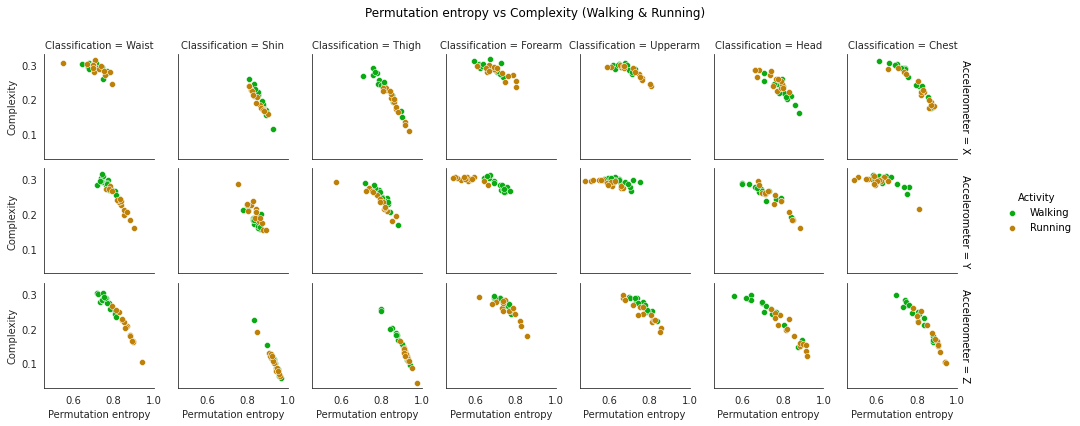

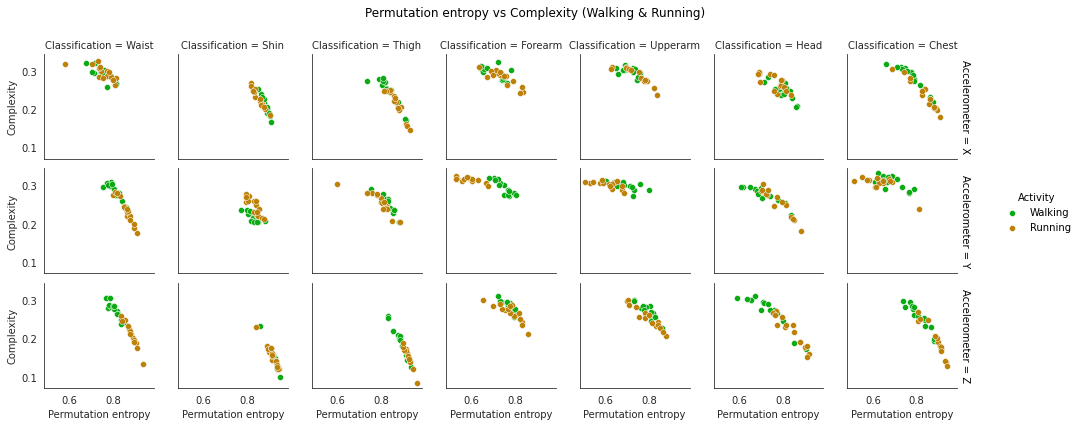

In [16]:
#generating scatter plot for permutation entropy vs complexity (Running and Walking)

Activity = ['Running', 'Walking']
activity_r_w = output_table[output_table['Activity'].isin(Activity)]
activity_cl = activity_r_w[(activity_r_w.Signal_length == 4096) & (activity_r_w.Delay == 1)]
colors = ["#0AAA13", "#BE8107"]
sns.set_palette(sns.color_palette(colors))
emb_dim = [3,4,5,6]
#Plotting complexity vs permutation entropy for walking and running
for e in emb_dim:
  scatter_plot_dataframe_r_w = activity_cl[activity_cl['Dimension'] == e]
  with sns.axes_style("white"):
    g = sns.FacetGrid(scatter_plot_dataframe_r_w, col="Classification", row="Accelerometer",hue='Activity', margin_titles=True, height=2.0)

  g.map(sns.scatterplot, 'Permutation entropy', 'Complexity')
  g.add_legend()
  g.fig.subplots_adjust(top = 0.87) 
  g.fig.suptitle('Permutation entropy vs Complexity (Walking & Running)')

4. Generate scatter plots: permutation entropy vs complexity and color the points according to climbing up and climbing down (for signal length =4096, embedded delay = 1, and embedded dimension = 3, 4, 5, 6, all three accelerometer directions)

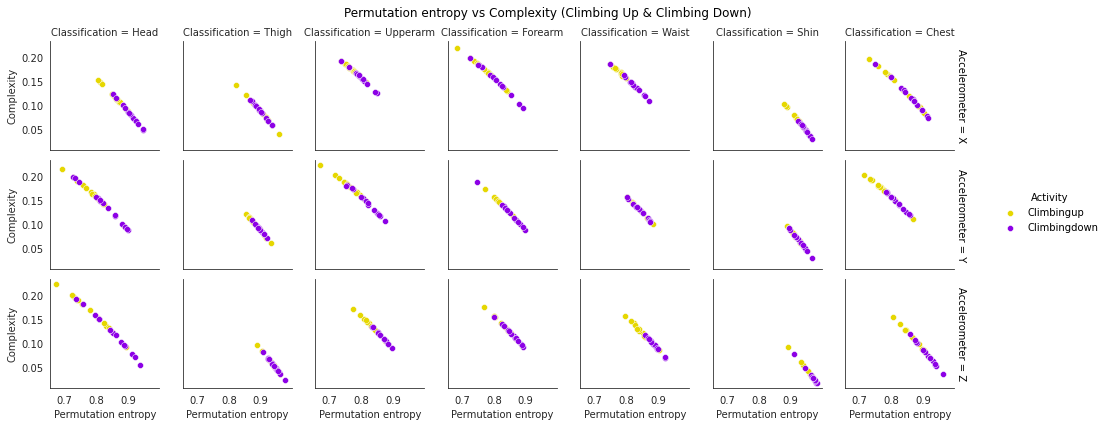

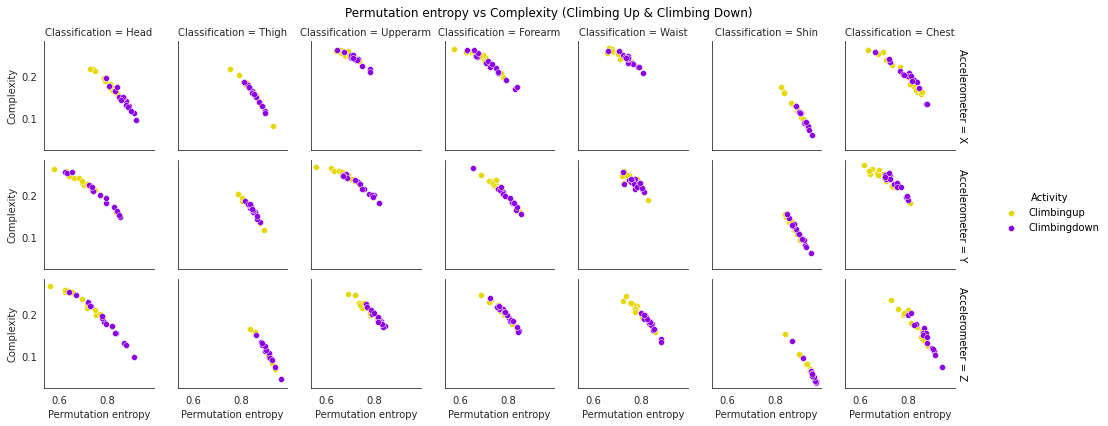

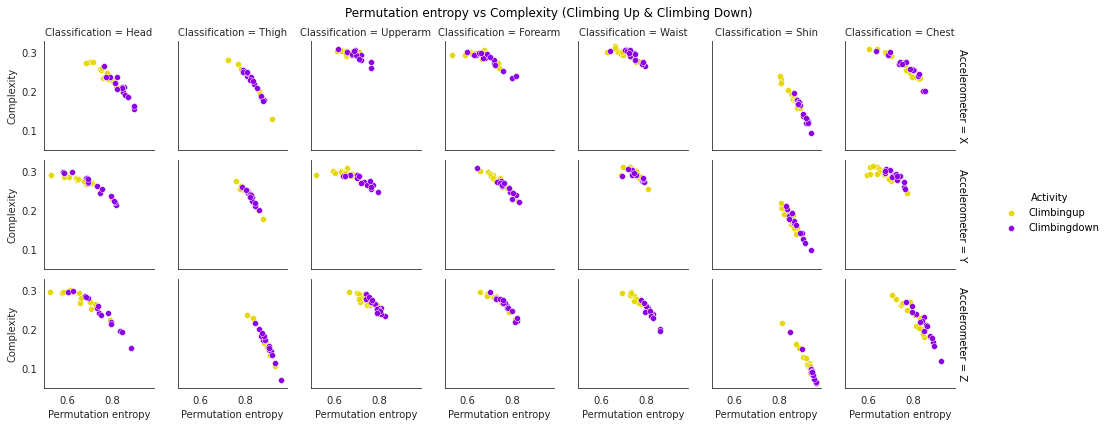

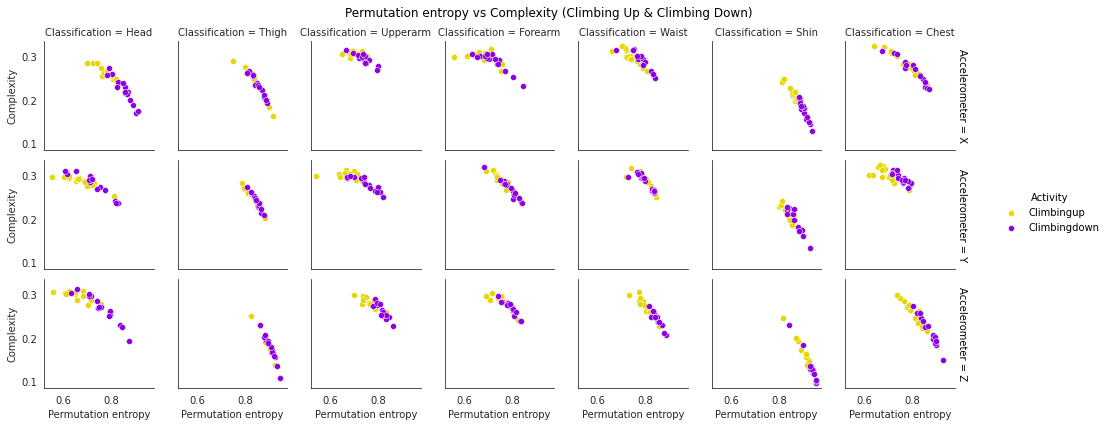

In [17]:
#generating scatter plot for permutation entropy vs complexity (Climbingup and Climbingdown)

Activity = ['Climbingup', 'Climbingdown']
activity_cu_cd = output_table[output_table['Activity'].isin(Activity)]
activity_cle = activity_cu_cd[(activity_cu_cd.Signal_length == 4096) & (activity_cu_cd.Delay == 1)]
colors = ["#E6D700", "#8C00E6"]
sns.set_palette(sns.color_palette(colors))
emb_dim = [3,4,5,6]
#Plotting complexity vs permutation entropy for climbing up and climbing down
for e in emb_dim:
  scatter_dataframe_cu_cd = activity_cle[activity_cle['Dimension'] == e]
  with sns.axes_style("white"):
    g = sns.FacetGrid(scatter_dataframe_cu_cd, col="Classification", row="Accelerometer",hue='Activity', margin_titles=True, height=2.0)

  g.map(sns.scatterplot, 'Permutation entropy', 'Complexity')
  g.add_legend()
  g.fig.subplots_adjust(top = 0.9) # adjust the Figure
  g.fig.suptitle('Permutation entropy vs Complexity (Climbing Up & Climbing Down)')